In [24]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler


In [25]:
# Load the dataset
data = pd.read_csv('rhesus_incompatibility (2).csv') 

In [26]:
data.head()

,parent_rh_mother,parent_rh_father,antibodies,prev_pregnancy_outcome,age,ethnicity,socioeconomic_status,blood_group,risk_of_incompatibility
0,Positive,Positive,Low,No,28,Kalenjin,Medium,B-,0
1,Positive,Positive,High,No,34,Kalenjin,Low,B+,0
2,Positive,Positive,Low,No,42,Kalenjin,Low,B+,1
3,Positive,Positive,High,Complicated,33,Kalenjin,High,O-,1
4,Positive,Positive,Low,No,35,Kisii,Medium,O-,0


In [27]:
data.info


<bound method DataFrame.info of      parent_rh_mother parent_rh_father antibodies prev_pregnancy_outcome  age  \
0            Positive         Positive        Low                     No   28   
1            Positive         Positive       High                     No   34   
2            Positive         Positive        Low                     No   42   
3            Positive         Positive       High            Complicated   33   
4            Positive         Positive        Low                     No   35   
...               ...              ...        ...                    ...  ...   
6688         Positive         Negative       High            Complicated   37   
6689         Negative         Negative        Low                     No   31   
6690         Positive         Positive        Low                     No   19   
6691         Negative         Negative       High                     No   43   
6692         Positive         Negative       High                     No   34

In [28]:
data.shape

(6693, 9)

In [29]:
data.dropna(inplace=True)

In [30]:
data.shape

(6693, 9)

In [31]:
data.columns

Index(['parent_rh_mother', 'parent_rh_father', 'antibodies',
       'prev_pregnancy_outcome', 'age', 'ethnicity', 'socioeconomic_status',
       'blood_group', 'risk_of_incompatibility'],
      dtype='object')

In [32]:
data.describe

<bound method NDFrame.describe of      parent_rh_mother parent_rh_father antibodies prev_pregnancy_outcome  age  \
0            Positive         Positive        Low                     No   28   
1            Positive         Positive       High                     No   34   
2            Positive         Positive        Low                     No   42   
3            Positive         Positive       High            Complicated   33   
4            Positive         Positive        Low                     No   35   
...               ...              ...        ...                    ...  ...   
6688         Positive         Negative       High            Complicated   37   
6689         Negative         Negative        Low                     No   31   
6690         Positive         Positive        Low                     No   19   
6691         Negative         Negative       High                     No   43   
6692         Positive         Negative       High                     No   

In [33]:
from scipy import stats
duplicates=data.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
6688    False
6689    False
6690    False
6691    False
6692    False
Length: 6693, dtype: bool


In [34]:
duplicates_all_columns=data[data.duplicated()]
print(duplicates_all_columns)

     parent_rh_mother parent_rh_father antibodies prev_pregnancy_outcome  age  \
263          Positive         Positive       High                     No   37   
476          Negative         Positive       High            Complicated   41   
766          Negative         Positive        Low            Complicated   27   
969          Negative         Negative       High                     No   33   
1052         Negative         Negative        Low                     No   40   
...               ...              ...        ...                    ...  ...   
6648         Positive         Negative       High                     No   44   
6649         Positive         Positive       High                     No   32   
6662         Positive         Positive        Low                     No   35   
6673         Negative         Negative        Low                     No   26   
6681         Positive         Negative        Low                     No   29   

      ethnicity socioeconom

In [35]:
data.drop_duplicates(inplace=True)

In [36]:
data.drop_duplicates
clean=data.drop_duplicates
print(clean)

<bound method DataFrame.drop_duplicates of      parent_rh_mother parent_rh_father antibodies prev_pregnancy_outcome  age  \
0            Positive         Positive        Low                     No   28   
1            Positive         Positive       High                     No   34   
2            Positive         Positive        Low                     No   42   
3            Positive         Positive       High            Complicated   33   
4            Positive         Positive        Low                     No   35   
...               ...              ...        ...                    ...  ...   
6688         Positive         Negative       High            Complicated   37   
6689         Negative         Negative        Low                     No   31   
6690         Positive         Positive        Low                     No   19   
6691         Negative         Negative       High                     No   43   
6692         Positive         Negative       High                 

In [37]:
# Check for missing values
print(data.isnull().sum())

parent_rh_mother           0
parent_rh_father           0
antibodies                 0
prev_pregnancy_outcome     0
age                        0
ethnicity                  0
socioeconomic_status       0
blood_group                0
risk_of_incompatibility    0
dtype: int64


In [38]:
# Convert categorical variables to numerical format using one-hot encoding 
data_encoded = pd.get_dummies(data, columns=['parent_rh_mother', 'parent_rh_father', 'antibodies',
                                             'prev_pregnancy_outcome', 'ethnicity',
                                             'socioeconomic_status', 'blood_group'], drop_first=True)

In [39]:
# Normalize the 'age' feature 
scaler = StandardScaler() 
data_encoded['age'] = scaler.fit_transform(data_encoded[['age']])

In [40]:
# Preview the processed data
print(data_encoded.head())

        age  risk_of_incompatibility  parent_rh_mother_Positive  \
0 -0.410239                        0                       True   
1  0.364022                        0                       True   
2  1.396371                        1                       True   
3  0.234979                        1                       True   
4  0.493066                        0                       True   

   parent_rh_father_Positive  antibodies_Low  prev_pregnancy_outcome_No  \
0                       True            True                       True   
1                       True           False                       True   
2                       True            True                       True   
3                       True           False                      False   
4                       True            True                       True   

   ethnicity_Kamba  ethnicity_Kikuyu  ethnicity_Kisii  ethnicity_Luhya  ...  \
0            False             False            False            Fa

In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [42]:
# Split the data into features (X) and target (y)
X = data_encoded.drop('risk_of_incompatibility', axis=1)
y = data_encoded['risk_of_incompatibility'] 

In [43]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Initialize and train the logistic regression model 
model = LogisticRegression(max_iter=1000)

In [45]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error
, confusion_matrix
, roc_curve, classification_report
# Predict on the test set 
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
# Calculate evaluation metrics 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
roc_auc = roc_auc_score(y_test, y_prob)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# Print the evaluation metrics 
print(f'Accuracy: {accuracy:.4f}') 
print(f'Precision: {precision:.4f}') 
print(f'Recall: {recall:.4f}') 
print(f'F1 Score: {f1:.4f}') 
print(f'ROC-AUC: {roc_auc:.4f}') 
print(f'MAE: {mae:.4f}') 
print(f'MSE: {mse:.4f}')

Accuracy: 0.9398
Precision: 0.9592
Recall: 0.9564
F1 Score: 0.9578
ROC-AUC: 0.9867
MAE: 0.0602
MSE: 0.0602


In [51]:
y_pred_labels=model.predict(X_test)

In [52]:
#convert probabilities to binary labels
y_pred_labels = (y_pred >= 0.5).astype(int)

In [54]:
y_test_labels = (y_test >= 0.5).astype(int)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")


MSE: 0.06019719771665802


In [59]:
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
accuracy = accuracy_score(y_test_labels, y_pred_labels)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
class_report = classification_report(y_test_labels, y_pred_labels)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.939802802283342
Confusion Matrix:
[[ 496   56]
 [  60 1315]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       552
           1       0.96      0.96      0.96      1375

    accuracy                           0.94      1927
   macro avg       0.93      0.93      0.93      1927
weighted avg       0.94      0.94      0.94      1927



In [60]:
print(accuracy)
print(confusion_matrix)
print(class_report)

0.939802802283342
<function confusion_matrix at 0x000002622A9ED9E0>
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       552
           1       0.96      0.96      0.96      1375

    accuracy                           0.94      1927
   macro avg       0.93      0.93      0.93      1927
weighted avg       0.94      0.94      0.94      1927



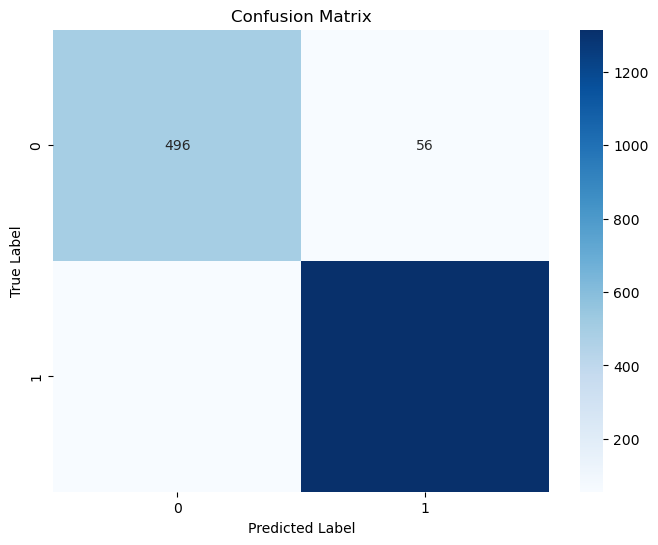

In [61]:
import matplotlib.pyplot as plt 
import seaborn as sns 
# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting the Confusion Matrix 
plt.figure(figsize=(8, 6)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted Label')
plt.ylabel('True Label') 
plt.show()

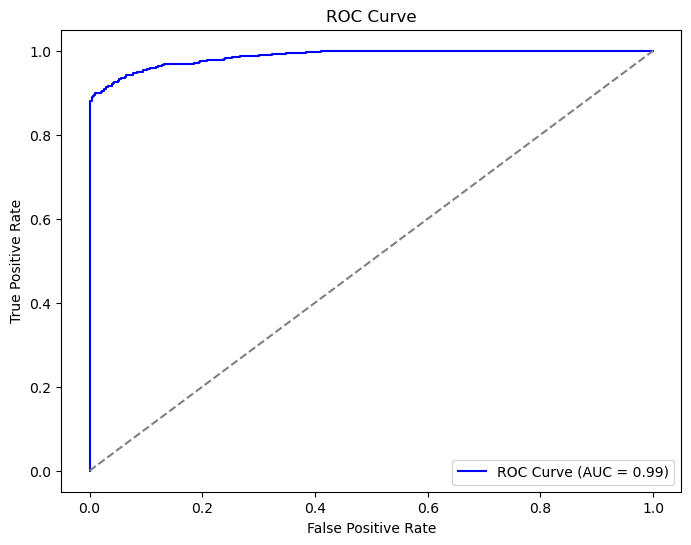

In [62]:
# ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test, y_prob) 
# Plotting the ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc='lower right')
plt.show()

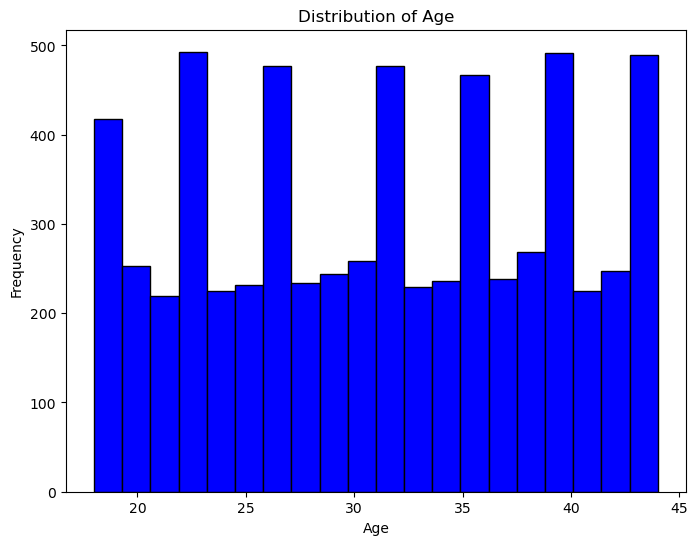

In [63]:
# Example: Histogram of Age 
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age') 
plt.ylabel('Frequency')
plt.show()

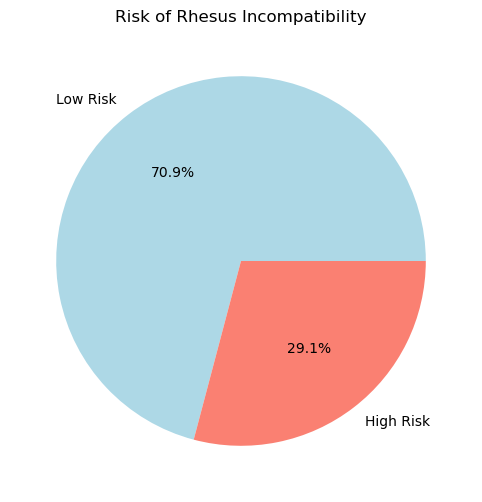

In [64]:
# Example: Pie Chart of Risk of Incompatibility
risk_counts = data['risk_of_incompatibility'].value_counts() 
plt.figure(figsize=(8, 6))
plt.pie(risk_counts, labels=['Low Risk', 'High Risk'], autopct='%1.1f%%', colors=['lightblue', 'salmon']) 
plt.title('Risk of Rhesus Incompatibility')
plt.show()

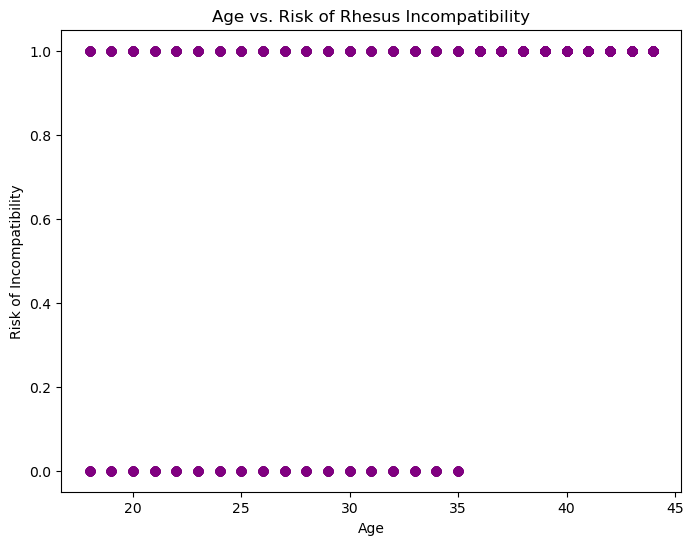

In [65]:
# Example: Scatter Plot of Age vs. Risk 
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['risk_of_incompatibility'], alpha=0.5, color='purple')
plt.title('Age vs. Risk of Rhesus Incompatibility') 
plt.xlabel('Age') 
plt.ylabel('Risk of Incompatibility')
plt.show()

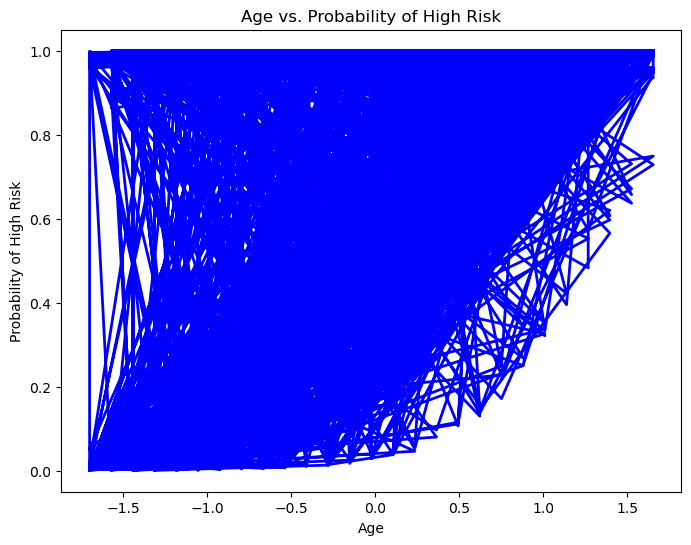

In [66]:
# Example: Line Graph of Age vs. Probability of High Risk (Use model probabilities) 
probabilities = model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 6)) 
plt.plot(X_test['age'], probabilities, 'b-', linewidth=2)
plt.title('Age vs. Probability of High Risk') 
plt.xlabel('Age') 
plt.ylabel('Probability of High Risk') 
plt.show()

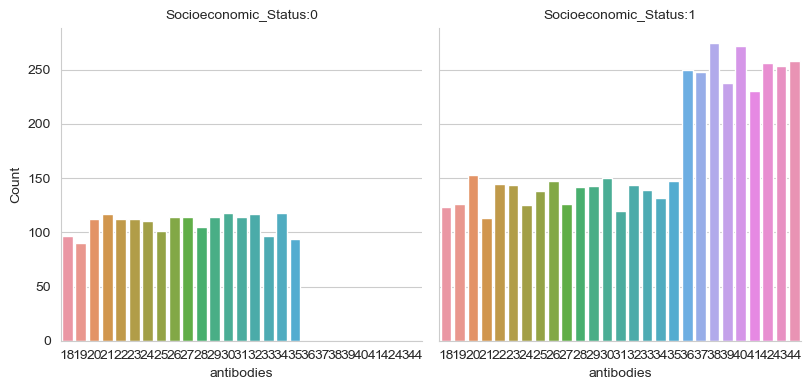

In [67]:
sns.set_style('whitegrid')
df=pd.read_csv("rhesus_incompatibility (2).csv")
df.head
g=sns.catplot(
    data=df,
    x='age',
    col='risk_of_incompatibility',
    kind='count',
    height=4,
    aspect=1,
    col_wrap=3
)
g.set_axis_labels('antibodies','Count')
g.set_titles('Socioeconomic_Status:{col_name}')
g.tight_layout()
plt.show()

In [68]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [69]:
import streamlit as st
# Title of the app
st.title('Solving_of_rh_incompatibility')

# Display text
st.write('lets_solve_rh_incompatibility.')

# Add a slider widget
number = st.slider('Pick a number', 0, 100, 50)
st.write('You selected:', number)

2024-08-30 09:49:55.319 
  command:

    streamlit run C:\Users\ADMIN\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [70]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [71]:
data = pd.read_csv('rhesus_incompatibility (2).csv')

In [74]:
model=LogisticRegression()

In [73]:
import joblib
joblib_file = "logistic_regression_model 2.joblib"
joblib.dump(model, joblib_file)

['logistic_regression_model 2.joblib']